<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240517_offline_code_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import Sequential

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [50]:
# loading data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [51]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

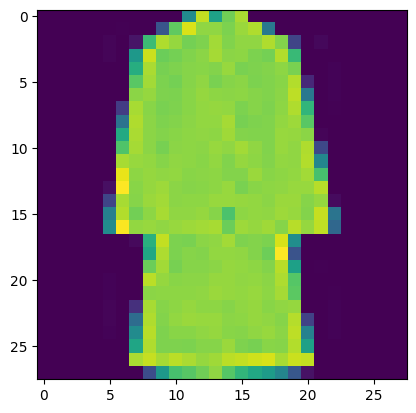

In [19]:
plt.imshow(x_train[np.random.randint(0, 60000)])

In [ ]:
mnist_fashion_label = [
    "T-shirt/top", # 인덱스 0
    "Trouser", # 인덱스 1
    "Pullover", # 인덱스 2
    "Dress", # 인덱스 3
    "Coat", # 인덱스 4
    "Sandal", # 인덱스 5
    "Shirt", # 인덱스 6
    "Sneaker", # 인덱스 7
    "Bag", # 인덱스 8
    "Ankle boot" # 인덱스 9
]

## 데이터 전처리

In [52]:
# 어차피 모든 데이터의 크기 범위가 같아서 필요없지만 해주면 좋아.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


In [53]:
## resize 와 reshape의 차이 resize 는 inplace


# dataset의 차원을 늘려줘야. filter가 추가되는 구조를 만들 수 있어.
w, h  = 28,28
refinedXtrain = x_train.reshape(x_train.shape[0],w,h,1)
refinedXtest = x_test.reshape(x_test.shape[0], w,h, 1)

In [57]:
refinedXtrain.shape

(60000, 28, 28, 1)

In [41]:
pd.DataFrame(refinedXtrain)

""


In [25]:
np.unique(y_train), np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [34]:
# one hot encoding / 이미 라벨링이 끝난 상태
refinedYtrain = keras.utils.to_categorical(y_train,10)
refinedYtest = keras.utils.to_categorical(y_test,10)

In [74]:
refinedYtrain[25]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
pd.DataFrame(refinedYtrain)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
ohe = OneHotEncoder()

oheYtrain = ohe.fit_transform(y_train.reshape(-1,1))

In [72]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [73]:
y_train.reshape(-1,1)

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [71]:
pd.Series(oheYtrain.data)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
59995    1.0
59996    1.0
59997    1.0
59998    1.0
59999    1.0
Length: 60000, dtype: float64

## 모델 생성

In [77]:
# input shape
inputshape = refinedXtrain[0].shape

In [83]:
cnn = Sequential()
# input layer
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = inputshape))

# hidden layer
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
cnn.add((MaxPooling2D(pool_size = (2,2) )))

cnn.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
cnn.add((MaxPooling2D(pool_size = (2,2) )))

cnn.add(Flatten())
## 궁금한 것, drop out은 그럼 flatten에 적용되는 건가? node를 꺼주는 거 아닌가?
## 만약 전체에 적용이 되는 거라면
# drop rate는 70% 를 드랍한다는 거 아닌가?
cnn.add(Dropout(rate = 0.7))

cnn.add(Dense(units = 10 ,activation = 'softmax'))


In [92]:
(32* (9)) * 32

9216

In [80]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                 

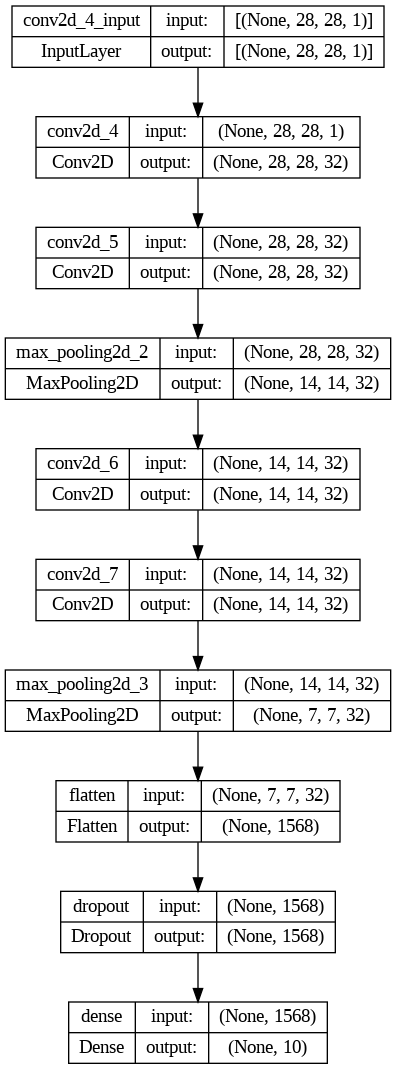

In [84]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes = True)

In [85]:
cnn.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics= [ 'accuracy'])
# 저왁도 지표  precision, recall, f1_score etc.

In [88]:
# model train
cnn.fit(refinedXtrain,refinedYtrain, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 137s 90ms/step - loss: 0.5689 - accuracy: 0.7935 - val_loss: 0.3302 - val_accuracy: 0.8811
Epoch 2/10
1500/1500 [==============================] - 133s 88ms/step - loss: 0.3674 - accuracy: 0.8675 - val_loss: 0.2916 - val_accuracy: 0.8918
Epoch 3/10
1500/1500 [==============================] - 130s 87ms/step - loss: 0.3283 - accuracy: 0.8809 - val_loss: 0.2781 - val_accuracy: 0.8997
Epoch 4/10
1500/1500 [==============================] - 130s 87ms/step - loss: 0.3030 - accuracy: 0.8901 - val_loss: 0.2529 - val_accuracy: 0.9067
Epoch 5/10
1500/1500 [==============================] - 132s 88ms/step - loss: 0.2838 - accuracy: 0.8968 - val_loss: 0.2390 - val_accuracy: 0.9145
Epoch 6/10
1500/1500 [==============================] - 139s 93ms/step - loss: 0.2733 - accuracy: 0.9018 - val_loss: 0.2355 - val_accuracy: 0.9147
Epoch 7/10
1500/1500 [==============================] - 133s 88ms/step - loss: 0.2613 - accuracy: 0.9056 - val_loss: 0

## Model Validataion

In [93]:
import cv2

In [122]:
inputImg = refinedXtest[10]

In [123]:
inputImg.shape

(28, 28, 1)

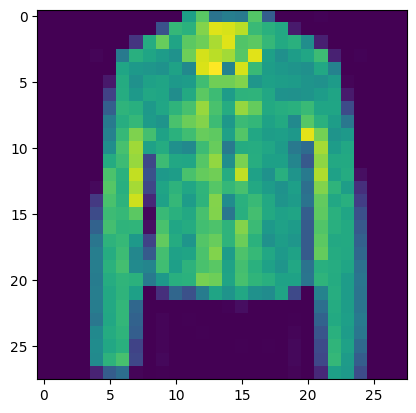

In [124]:
plt.imshow(inputImg)

In [125]:
refinedInput = inputImg.reshape(1,w,h,1)

In [126]:
pred = cnn.predict(refinedInput)
pred

1/1 [==============================] - 0s 21ms/step


array([[2.4257022e-05, 1.0063815e-07, 8.3315447e-03, 4.3450932e-08,
        9.8086208e-01, 4.7455835e-08, 1.0779074e-02, 5.2538990e-10,
        2.4292277e-07, 2.6964869e-06]], dtype=float32)

In [127]:
predarg = np.argmax(pred)

In [128]:
predarg

4

In [130]:
y_test[10]

4

In [164]:
inImg = cv2.imread('./shirt_img.jpg', cv2.IMREAD_COLOR)
inImg.shape

(192, 204, 3)

In [168]:
# 외부 이미지 전처리

refinedimg= cv2.cvtColor(inImg,cv2.COLOR_BGR2GRAY)


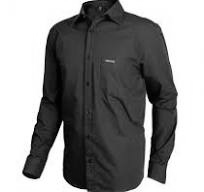

In [169]:
from google.colab.patches import cv2_imshow
cv2_imshow(refinedimg)

In [152]:
refinedimg  = refinedimg / 255

In [153]:
refinedimg

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

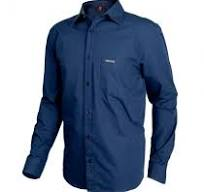

In [149]:
cv2_imshow(inImg)

In [155]:
refinedSizeimg = cv2.resize(refinedimg, (w,h))
refinedShapeimg = refinedSizeimg.reshape(1,w,h,1)

In [162]:
cv2_imshow(refinedSizeimg)

In [157]:
pred = np.argmax(cnn.predict(refinedShapeimg))

1/1 [==============================] - 0s 21ms/step


In [158]:
pred

8